In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame
data = pd.read_csv('digit-recognizer\\train.csv')

# Check the first few rows to understand the structure
print(data.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
X = data.drop('label', axis=1)  # Features
y = data['label']  # Labels

# Normalize pixel values
X = X / 255.0


In [3]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [4]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a Sequential RNN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
Train_History = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

#Saving the model
model.save("Digit_recognizer_model.h5")

Epoch 1/30
919/919 [==============================] - 2s 2ms/step - loss: 0.3899 - accuracy: 0.8860 - val_loss: 0.2150 - val_accuracy: 0.9378
Epoch 2/30
919/919 [==============================] - 1s 2ms/step - loss: 0.1916 - accuracy: 0.9429 - val_loss: 0.1542 - val_accuracy: 0.9540
Epoch 3/30
919/919 [==============================] - 2s 2ms/step - loss: 0.1449 - accuracy: 0.9573 - val_loss: 0.1289 - val_accuracy: 0.9619
Epoch 4/30
919/919 [==============================] - 1s 2ms/step - loss: 0.1172 - accuracy: 0.9645 - val_loss: 0.1176 - val_accuracy: 0.9645
Epoch 5/30
919/919 [==============================] - 1s 2ms/step - loss: 0.0960 - accuracy: 0.9702 - val_loss: 0.1048 - val_accuracy: 0.9684
Epoch 6/30
919/919 [==============================] - 1s 2ms/step - loss: 0.0834 - accuracy: 0.9745 - val_loss: 0.1031 - val_accuracy: 0.9690
Epoch 7/30
919/919 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9779 - val_loss: 0.0964 - val_accuracy: 0.9711
Epoch 

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


394/394 [==============================] - 0s 899us/step - loss: 0.1169 - accuracy: 0.9760
Test Accuracy: 0.9760317206382751


In [8]:
predictions = model.predict(X_test)

#Print the predicted class for the first test sample
print(f'Predicted Class: {tf.argmax(predictions[0])}')


Predicted Class: 8


In [9]:
# Load the CSV file into a DataFrame
test_data = pd.read_csv('digit-recognizer\\test.csv')

# Check the first few rows to understand the structure
print(test_data.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [10]:
test_features = test_data / 255.0  # Normalize pixel values


In [11]:
predictions = model.predict(test_features)

# Example: Print the predicted class for the first test sample
predicted_labels = [tf.argmax(pred).numpy() for pred in predictions]

# Add the predicted labels to the test DataFrame
test_data['predicted_label'] = predicted_labels

# Display the DataFrame with predicted labels
print(test_data.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  predicted_label  
0         0      

In [12]:
test_data.to_csv('digit-recognizer\\labeled_test.csv', index=False)

In [13]:
# Create a new DataFrame with 'image_id' and 'predicted_label'
result_df = pd.DataFrame({'image_id': test_data.index, 'predicted_label': predicted_labels})

# Save the result DataFrame to a CSV file
result_df.to_csv('digit-recognizer\\test_id_and_labels.csv', index=False)

Let's do a test

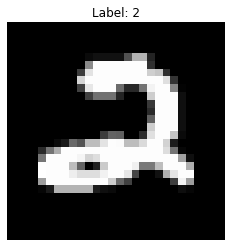

In [14]:
# Load your dataset 
predicted_data = pd.read_csv('digit-recognizer\\test_id_and_labels.csv')
data = pd.read_csv('digit-recognizer\\test.csv')

# Choose a row to display (for example, the first row)
row_index = 0

# Extract the predicted label from the cv we predicted it and pixel values from the origin data 
label = predicted_data.loc[row_index, 'predicted_label']
pixels = data.loc[row_index, 'pixel0':'pixel783']  # Assuming 28x28 = 784 pixels

# Reshape pixel values into a 28x28 array
image_array = np.array(pixels).reshape(28, 28)

# Display the image
plt.imshow(image_array, cmap='gray')  # Display the image in grayscale
plt.title(f'Label: {label}')  # Add the label as the title
plt.axis('off')  # Turn off axis
plt.show()

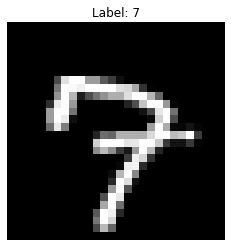

In [15]:
# Choose a row to display (for example, the first row)
row_index = 5

# Extract the predicted label from the cv we predicted it and pixel values from the origin data 
label = predicted_data.loc[row_index, 'predicted_label']
pixels = data.loc[row_index, 'pixel0':'pixel783']  # Assuming 28x28 = 784 pixels

# Reshape pixel values into a 28x28 array
image_array = np.array(pixels).reshape(28, 28)

# Display the image
plt.imshow(image_array, cmap='gray')  # Display the image in grayscale
plt.title(f'Label: {label}')  # Add the label as the title
plt.axis('off')  # Turn off axis
plt.show()

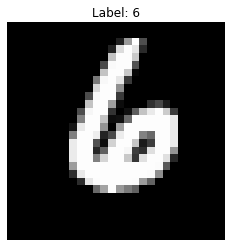

In [16]:
# Choose a row to display (for example, the first row)
row_index = 50

# Extract the predicted label from the cv we predicted it and pixel values from the origin data 
label = predicted_data.loc[row_index, 'predicted_label']
pixels = data.loc[row_index, 'pixel0':'pixel783']  # Assuming 28x28 = 784 pixels

# Reshape pixel values into a 28x28 array
image_array = np.array(pixels).reshape(28, 28)

# Display the image
plt.imshow(image_array, cmap='gray')  # Display the image in grayscale
plt.title(f'Label: {label}')  # Add the label as the title
plt.axis('off')  # Turn off axis
plt.show()